### Introduction

About 54062 new cases of breast cancer happen every year. This is why breast cancer is the most frequent female cancer. Fortunately the number of deaths from this cancer has not risen since the 1980's. Thanks to the medecine improvement 3 breast cancers out of 4 are cured.  
For this project we decide to create a classifier which can identify the cancer seriousness and if the tumors are malignant or benign.

### 1 - Data Exploration

In [255]:
# Importing Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score,roc_auc_score

In [256]:
# Import the data
df = pd.read_csv('Breast_Cancer.csv')

In [257]:
# Check the 5 first rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [258]:
# Overall view of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [259]:
# Summary of numeric columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


We can see that there are no null values. We will remove the id and Unnamed:32 columns since they don't have any relevant information.

In [260]:
# Drop the unwanted variables
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [261]:
# Find the different diagnosis outcomes
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

There are 2 outcomes: Malignant and Benign.

### 2 - Data Visualization

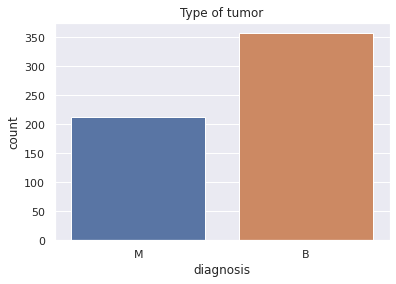

In [262]:
# Plot the number of patients by diagnosis
ax=sns.countplot(x='diagnosis',data=df)
ax.set_title('Type of tumor')
sns.set_theme(style='darkgrid')

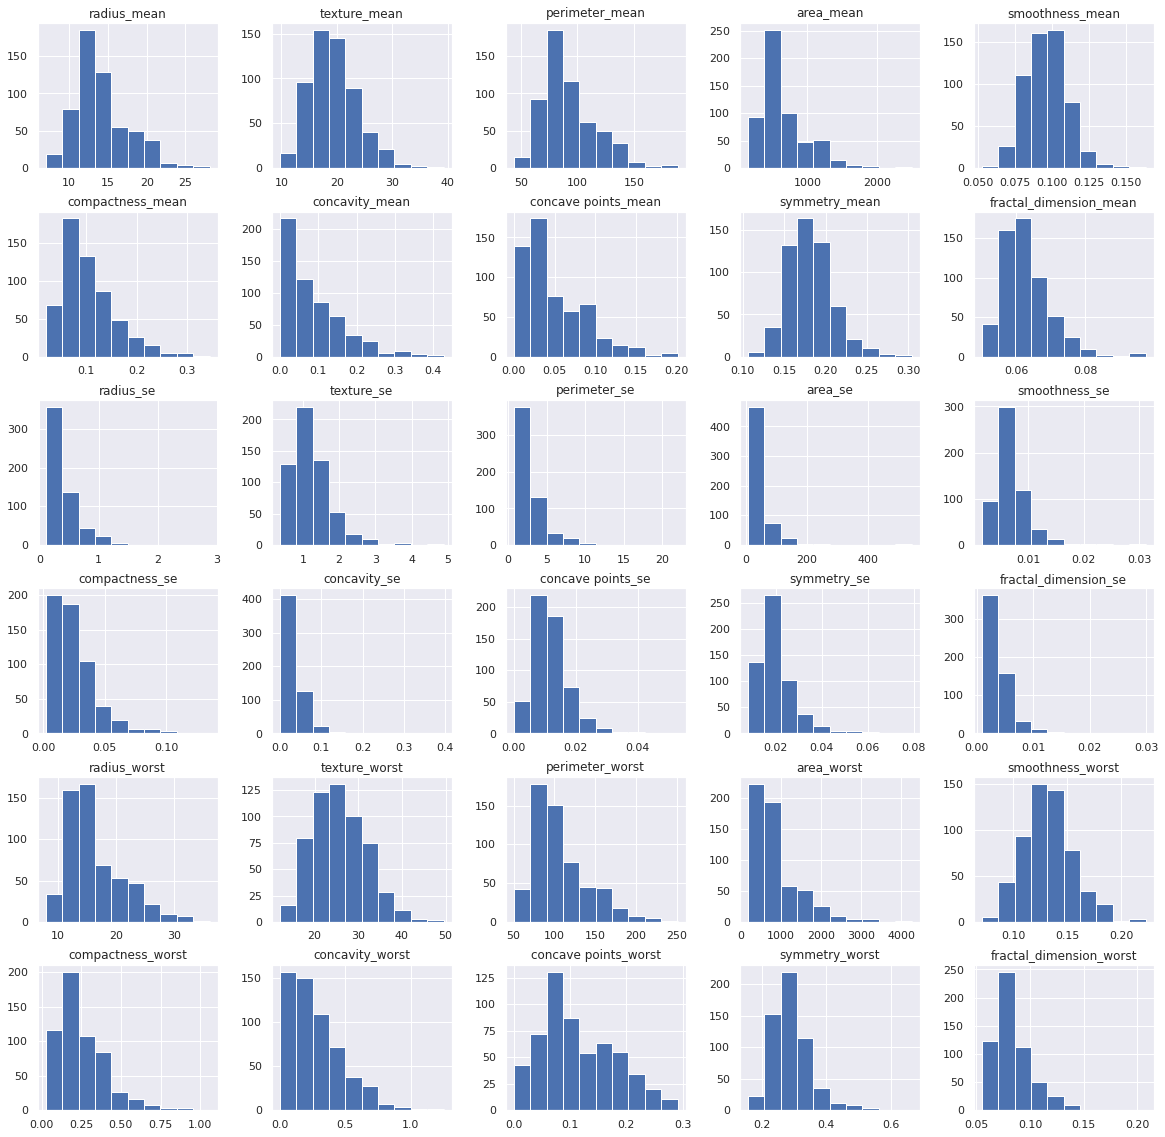

In [263]:
# Plot histograms for all numeric variables
df.hist(figsize=(20,20))
plt.show()

In [264]:
# Plot the correlation matrix
df.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.0,0.341,0.998,1.0,0.149,0.498,0.646,0.76,0.12,-0.35,0.55,-0.144,0.566,0.738,-0.326,0.265,0.365,0.411,-0.241,-0.00841,0.979,0.315,0.972,0.979,0.126,0.491,0.596,0.727,0.175,0.0446
texture_mean,0.341,1.0,0.348,0.344,0.0246,0.266,0.343,0.307,0.11,-0.0593,0.364,0.451,0.387,0.395,0.037,0.264,0.287,0.239,0.00895,0.148,0.367,0.909,0.375,0.368,0.101,0.291,0.34,0.319,0.121,0.116
perimeter_mean,0.998,0.348,1.0,0.997,0.183,0.544,0.682,0.789,0.15,-0.305,0.56,-0.138,0.583,0.746,-0.311,0.309,0.402,0.442,-0.228,0.0324,0.981,0.323,0.979,0.981,0.157,0.535,0.632,0.758,0.199,0.089
area_mean,1.0,0.344,0.997,1.0,0.138,0.489,0.643,0.755,0.114,-0.358,0.553,-0.142,0.568,0.742,-0.327,0.26,0.362,0.406,-0.244,-0.0127,0.979,0.318,0.972,0.98,0.12,0.486,0.594,0.723,0.171,0.0388
smoothness_mean,0.149,0.0246,0.183,0.138,1.0,0.679,0.519,0.565,0.542,0.588,0.334,0.0913,0.331,0.296,0.339,0.392,0.355,0.439,0.151,0.413,0.203,0.0606,0.226,0.192,0.796,0.481,0.429,0.499,0.394,0.511
compactness_mean,0.498,0.266,0.544,0.489,0.679,1.0,0.897,0.848,0.552,0.499,0.507,0.0478,0.584,0.54,0.127,0.818,0.772,0.732,0.0984,0.621,0.543,0.255,0.592,0.532,0.579,0.901,0.838,0.825,0.45,0.689
concavity_mean,0.646,0.343,0.682,0.643,0.519,0.897,1.0,0.927,0.447,0.258,0.575,0.0513,0.646,0.644,0.0703,0.761,0.858,0.775,0.0228,0.514,0.682,0.336,0.722,0.677,0.489,0.85,0.939,0.905,0.384,0.542
concave points_mean,0.76,0.307,0.789,0.755,0.565,0.848,0.927,1.0,0.424,0.143,0.635,0.00871,0.68,0.727,0.0168,0.608,0.675,0.758,-0.0284,0.378,0.787,0.301,0.814,0.78,0.49,0.758,0.827,0.937,0.355,0.421
symmetry_mean,0.12,0.11,0.15,0.114,0.542,0.552,0.447,0.424,1.0,0.428,0.338,0.139,0.355,0.288,0.206,0.436,0.368,0.383,0.384,0.403,0.165,0.119,0.191,0.154,0.424,0.441,0.394,0.397,0.71,0.41
fractal_dimension_mean,-0.35,-0.0593,-0.305,-0.358,0.588,0.499,0.258,0.143,0.428,1.0,0.00148,0.157,0.0553,-0.12,0.402,0.481,0.344,0.286,0.314,0.684,-0.295,-0.0478,-0.247,-0.305,0.493,0.404,0.243,0.139,0.295,0.761


<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

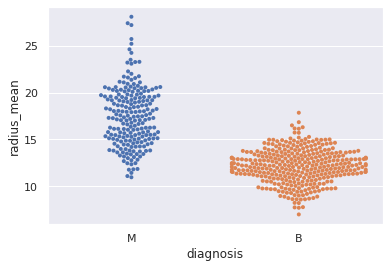

In [265]:
sns.swarmplot(y='radius_mean',x='diagnosis',data=df,size=4)

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

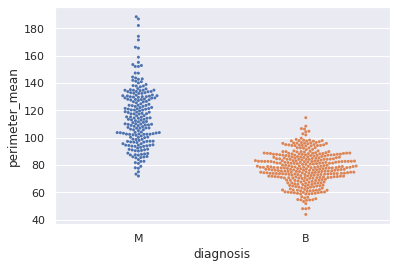

In [266]:
sns.swarmplot(y='perimeter_mean',x='diagnosis',data=df,size=3)

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

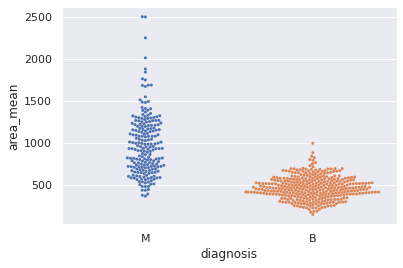

In [267]:
sns.swarmplot(y='area_mean',x='diagnosis',data=df,size=3)

### 3 - Define features and target

In [268]:
# Binarizing the target variable:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [269]:
features=df.drop(['diagnosis'], axis=1)
target=df['diagnosis']

In [270]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [271]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### 4 - Split the data

In [272]:
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [273]:
# Split the data in train and test
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2,random_state=42)

In [274]:
print (X_train.shape, X_test.shape, y_train.shape, \
y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### 5 - Feature engineering

For our dataset, there is no need to do a feature engineering

### 6 - Feature Scaling

In [275]:
# Importing the model:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()),
])

### 7 - KNN - Classifier

**Without StandardScaler()**

In [277]:
# Initiating the model:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]
print('Precision: %.2f' % precision_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Precision: 1.00
Misclassified samples: 5


Without any detail, the number of neighbors of the model is 5.

In [278]:
# examine the class distribution of the testing set (using a Pandas Series method)
print("Examine the class distribution:","\n",y_test.value_counts())

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("calculate the percentage of ones:",y_test.mean(),"\n")

# calculate the percentage of zeros
print("calculate the percentage of zeros:",1 - y_test.mean(),"\n")

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
print("calculate null accuracy:",max(y_test.mean(), 1 - y_test.mean()),"\n")

# calculate null accuracy (for multi-class classification problems)
print("calculate null accuracy :",y_test.value_counts().head(1) / len(y_test),"\n")

# print the first 70 true and predicted responses
print("Print the first 70 true and predicted responses:")

occ =pd.DataFrame({'True': y_test.values[0:70], 'Column2': y_pred[0:70]})
occ

Examine the class distribution: 
 0    71
1    43
Name: diagnosis, dtype: int64
calculate the percentage of ones: 0.37719298245614036 

calculate the percentage of zeros: 0.6228070175438596 

calculate null accuracy: 0.6228070175438596 

calculate null accuracy : 0    0.622807
Name: diagnosis, dtype: float64 

Print the first 70 true and predicted responses:


,True,Column2
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [279]:
# creating a list of K for KNN from 1 to 10
k_list= list(range(1,11))

def knn_alg(X_train, y_train, X_test, y_test, N):
    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(X_train, y_train)

    try:
        y_pred=knn.predict(X_test)
        print('Precision for',N,'neighbors: %.2f' % precision_score(y_test, y_pred))
    except NotFittedError as e:
        print(repr(e))

In [280]:
# apply the function
for N in k_list:
    knn_alg(X_train, y_train, X_test, y_test, N)

Precision for 1 neighbors: 0.95
Precision for 2 neighbors: 0.97
Precision for 3 neighbors: 0.93
Precision for 4 neighbors: 1.00
Precision for 5 neighbors: 1.00
Precision for 6 neighbors: 1.00
Precision for 7 neighbors: 0.97
Precision for 8 neighbors: 0.97
Precision for 9 neighbors: 0.97
Precision for 10 neighbors: 1.00


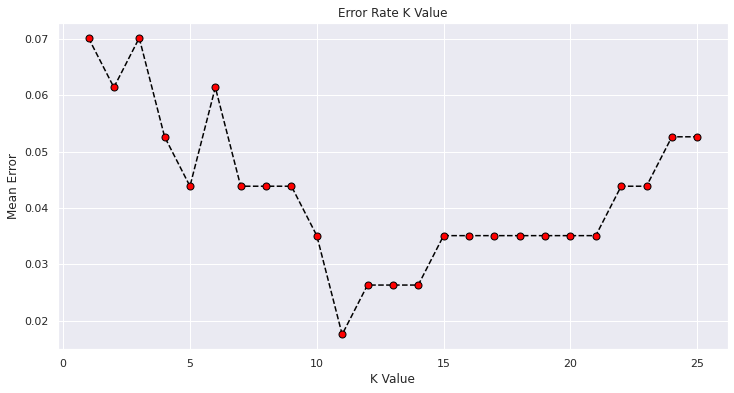

In [281]:
# calculate the error rate
error=[]
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,26), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(1)

Here the optimal number of neighbors is 11. Let's try with this number.

In [282]:
knn_11 = KNeighborsClassifier(n_neighbors=11)
knn_11.fit(X_train, y_train)
y_pred_11 = knn_11.predict(X_test)
y_pred_prob_11 = knn_11.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred_11))

[[71  0]
 [ 2 41]]


In [283]:
print(classification_report(y_test, y_pred_11))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [284]:
classif=pd.DataFrame({'True': y_test.values, 'Pred': y_pred_prob_11})
classif.loc[classif['Pred']>0.5, 'class'] = 'class 4'
classif.loc[classif['Pred']<0.5, 'class'] = 'class 2'

In [285]:
classif[classif['True']==1]['class'].value_counts()

class 4    41
class 2     2
Name: class, dtype: int64

41 malignant tumors were accurately classed with a probability higher than 0.5.

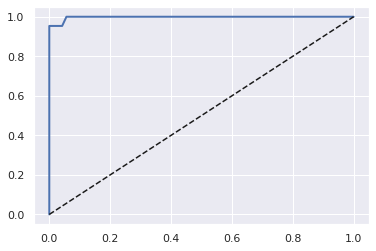

In [286]:
# ROC - AUC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_11, pos_label=1)
plt.plot(fpr,tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

In [287]:
print('The ROC AUC score is:',roc_auc_score(y_test, y_pred_prob_11).round(3))

The ROC AUC score is: 0.998


This score shows our KNN classifier is excellent.

In [288]:
# Using K-fold cross-validation
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,26))

neighbors=k_list
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean().round(2))

In [289]:
# Printing the first 5 cv scores
cv_scores[:5]

[0.91, 0.92, 0.93, 0.93, 0.92]

Now let's try to calculate the optimal number of neighbors but instead of using the error rate misclassification(np.mean(pred_i != y_test)), we will use the calculation (1 - cv_score) for each number of neighbors.

The optimal number of neighbors is 3


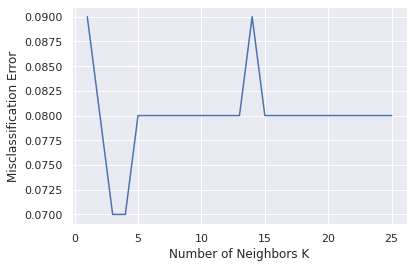

In [290]:
# changing to misclassification error
MSE = [1-x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

As we can see the optimal number of neighbors is different from the one we found with the (np.mean(pred_i != y_test)) method.

**With StandardScaler()**

In [291]:
# use the pipeline we create in part 6
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [292]:
y_pred_std = pipe.predict(X_test)
y_pred_prob_std = pipe.predict_proba(X_test)[:,1]

print('Precision: %.2f' % precision_score(y_test, y_pred_std))
print('Misclassified samples: %d' % (y_test != y_pred_std).sum())


Precision: 0.93
Misclassified samples: 6


In [293]:
# examine the class distribution of the testing set (using a Pandas Series method)
print("Examine the class distribution:","\n",y_test.value_counts())

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("calculate the percentage of ones:",y_test.mean(),"\n")

# calculate the percentage of zeros
print("calculate the percentage of zeros:",1 - y_test.mean(),"\n")

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
print("calculate null accuracy:",max(y_test.mean(), 1 - y_test.mean()),"\n")

# calculate null accuracy (for multi-class classification problems)
print("calculate null accuracy :",y_test.value_counts().head(1) / len(y_test),"\n")

# print the first 70 true and predicted responses
print("Print the first 70 true and predicted responses:")

occ1 =pd.DataFrame({'True': y_test.values[0:70], 'Column2': y_pred_std[0:70]})
occ1

Examine the class distribution: 
 0    71
1    43
Name: diagnosis, dtype: int64
calculate the percentage of ones: 0.37719298245614036 

calculate the percentage of zeros: 0.6228070175438596 

calculate null accuracy: 0.6228070175438596 

calculate null accuracy : 0    0.622807
Name: diagnosis, dtype: float64 

Print the first 70 true and predicted responses:


,True,Column2
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,0,1
9,0,0


In [294]:
# creating a list of K for KNN
k_list= list(range(1,11))

def pipe_alg(X_train, y_train, X_test, y_test, N):
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=N)),
    ])
    pipe.fit(X_train, y_train)

    try:
        y_pred_std=pipe.predict(X_test)
        print('Precision for',N,'neighbors: %.2f' % precision_score(y_test, y_pred_std))
    except NotFittedError as e:
        print(repr(e))

In [295]:
for N in k_list:
    pipe_alg(X_train, y_train, X_test, y_test, N)

Precision for 1 neighbors: 0.93
Precision for 2 neighbors: 0.97
Precision for 3 neighbors: 0.93
Precision for 4 neighbors: 0.95
Precision for 5 neighbors: 0.93
Precision for 6 neighbors: 0.95
Precision for 7 neighbors: 0.93
Precision for 8 neighbors: 0.95
Precision for 9 neighbors: 0.95
Precision for 10 neighbors: 0.95


The precision scores are lower than the ones we found without Standard Scaler.

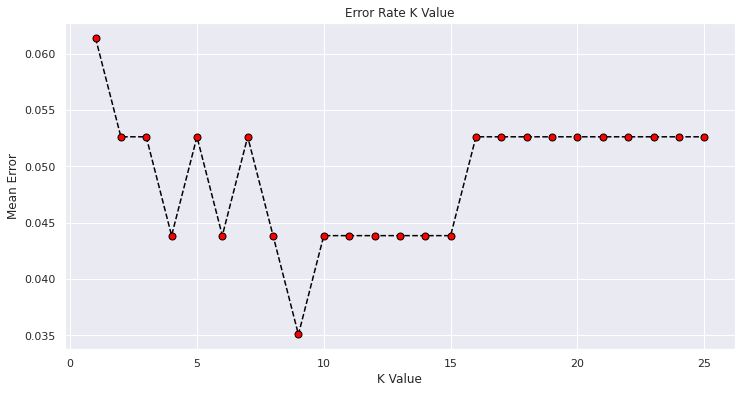

In [296]:
# Calculate the error rate
error=[]
for i in range(1,26):
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=i)),
    ])
    pipe.fit(X_train, y_train)
    pred_i_std = pipe.predict(X_test)
    error.append(np.mean(pred_i_std != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,26), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid(1)

With the Standard scaler, the optimal number of neighbors is 9. Let's try with this number for our model.

In [297]:
pipe_9 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9)),
    ])
pipe_9.fit(X_train, y_train)
y_pred_std_9 = pipe_9.predict(X_test)
y_pred_prob_std_9 = pipe_9.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred_std_9))

[[69  2]
 [ 2 41]]


In [298]:
print(classification_report(y_test, y_pred_std_9))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [299]:
classif1=pd.DataFrame({'True': y_test.values, 'Pred': y_pred_prob_std_9})
classif1.loc[classif['Pred']>0.5, 'class'] = 'class 4'
classif1.loc[classif['Pred']<0.5, 'class'] = 'class 2'

In [300]:
classif[classif['True']==1]['class'].value_counts()

class 4    41
class 2     2
Name: class, dtype: int64

Like previously 41 malignant tumors were accurately classed with a probability higher than 0.5.

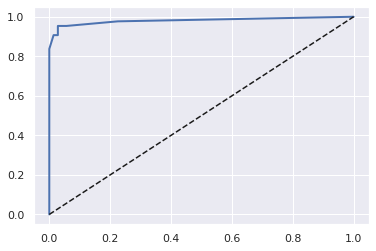

In [301]:
# ROC Curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_std_9, pos_label=1)
plt.plot(fpr,tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

In [302]:
print('The ROC AUC score is:',roc_auc_score(y_test, y_pred_prob_std_9).round(3))

The ROC AUC score is: 0.981


This score shows our KNN classifier is excellent. However the score is lower than the one without the Standard Scaler.

In [303]:
# K-Fold cross-validation
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,26))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=k)),
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean().round(2))

In [304]:
cv_scores[:5]

[0.94, 0.95, 0.96, 0.96, 0.97]

The optimal number of neighbors is 5


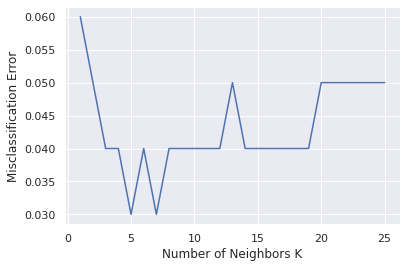

In [305]:
# changing to misclassification error
MSE = [1-x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

As we can see the optimal number of neighbors is different from the one we found with the (np.mean(pred_i != y_test)) method.

Unexpectedly we found better results without a Standard scaler.

### Bonus 2

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression()),
    ])
pipe2.fit(X_train, y_train)
y_pred_lr = pipe2.predict(X_test)
y_pred_prob_lr = pipe2.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



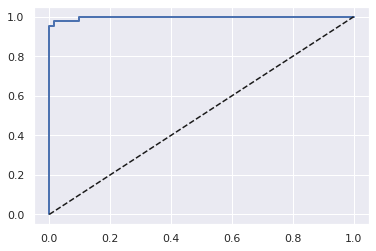

In [312]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr, pos_label=1)
plt.plot(fpr,tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

In [313]:
#Summary, Scores
relevant_metrics_pred = pd.DataFrame({
    'Model': [ 'KNN without StandardScaler', 'KNN with StandardScaler', 'Logistic Regression with Standard Scaler'],
    'Accuracy Score': [accuracy_score(y_test, y_pred_11), accuracy_score(y_test, y_pred_std_9),accuracy_score(y_test, y_pred_lr)]})
best_model_pred =relevant_metrics_pred.sort_values(by='Accuracy Score', ascending=False)
best_model_pred


,Model,Accuracy Score
0,KNN without StandardScaler,0.982456
2,Logistic Regression with Standard Scaler,0.973684
1,KNN with StandardScaler,0.964912
